In [1]:
import numpy as np
import noise
import matplotlib.pyplot as plt
import scipy
from PIL import Image
%matplotlib inline

In [2]:
def generate_world(width = 512, height = 512, scale = 100.0, octaves = 6, persistence = 0.5, lacunarity = 2.0):
    shape = (width, height)
    seed = np.random.randint(0,100)

    world = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            world[i][j] = noise.pnoise2(i/scale,
                                        j/scale,
                                        octaves=octaves,
                                        persistence=persistence,
                                        lacunarity=lacunarity,
                                        repeatx=width,
                                        repeaty=height,
                                        base=seed)


    return world

## world is a 2d array containing values from -1 to 1

In [3]:
world = generate_world(octaves = 4)

In [4]:
world.shape

(512, 512)

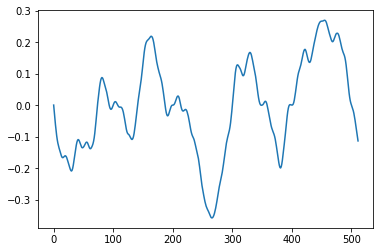

In [5]:
plt.figure()
plt.plot(world[0])

## scale the noise generated array

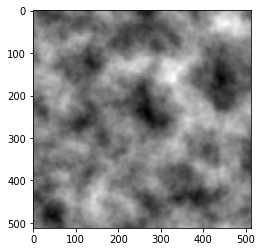

In [6]:
def normalize_array(image):
    # Normalize an array to a 0 - 255 value
    min = np.min(image)
    max = np.max(image)
    return np.uint8((image - min) * 255/(max - min))
    
image = Image.fromarray(normalize_array(world), 'P')
plt.imshow(image)

In [7]:
blue = [65,105,225]
green = [34,139,34]
beach = [238,214,175]
snow = [255,250,250]
mountain = [139,137,137]

def add_color(world):
    color_world = np.zeros(world.shape+(3,))
    for i in range(len(world[0])):
        for j in range(len(world[1])):
            if world[i][j] < -0.05:
                color_world[i][j] = blue
            elif world[i][j] < 0:
                color_world[i][j] = beach
            elif world[i][j] < .20:
                color_world[i][j] = green
            elif world[i][j] < 0.35:
                color_world[i][j] = mountain
            elif world[i][j] < 1.0:
                color_world[i][j] = snow

    return color_world

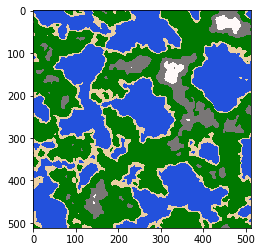

In [8]:
color_world = add_color(world)
color_image = Image.fromarray(normalize_array(color_world), "RGB")
plt.imshow(color_image)